In [22]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#plot cubes
def plotCube(pointsdef,ax,color):
    #Face
    X = [[pointsdef[0][0],pointsdef[1][0]],[pointsdef[2][0],pointsdef[3][0]]]
    Y = [[pointsdef[0][1],pointsdef[1][1]],[pointsdef[2][1],pointsdef[3][1]]]
    Z = np.array([[pointsdef[0][2],pointsdef[1][2]],[pointsdef[2][2],pointsdef[3][2]]])
    ax.plot_wireframe(X,Y,Z,color=color)
    #Face
    X = [[pointsdef[0][0],pointsdef[1][0]],[pointsdef[4][0],pointsdef[5][0]]]
    Y = [[pointsdef[0][1],pointsdef[1][1]],[pointsdef[4][1],pointsdef[5][1]]]
    Z = np.array([[pointsdef[0][2],pointsdef[1][2]],[pointsdef[4][2],pointsdef[5][2]]])
    ax.plot_wireframe(X,Y,Z,color=color)
    #Face
    X = [[pointsdef[4][0],pointsdef[5][0]],[pointsdef[6][0],pointsdef[7][0]]]
    Y = [[pointsdef[4][1],pointsdef[5][1]],[pointsdef[6][1],pointsdef[7][1]]]
    Z = np.array([[pointsdef[4][2],pointsdef[5][2]],[pointsdef[6][2],pointsdef[7][2]]])
    ax.plot_wireframe(X,Y,Z,color=color)
    #Face
    X = [[pointsdef[2][0],pointsdef[3][0]],[pointsdef[6][0],pointsdef[7][0]]]
    Y = [[pointsdef[2][1],pointsdef[3][1]],[pointsdef[6][1],pointsdef[7][1]]]
    Z = np.array([[pointsdef[2][2],pointsdef[3][2]],[pointsdef[6][2],pointsdef[7][2]]])
    ax.plot_wireframe(X,Y,Z,color=color)
    #ax.scatter3D(pointsdef[:, 0], pointsdef[:, 1], pointsdef[:, 2])

# Unitary cube definition
def unitCube():
    return np.array(   [[0, 0, 0],
                      [0, 0, 1],
                      [0, 1, 0],
                      [0, 1, 1],
                      [1, 0, 0],
                      [1, 0, 1],
                      [1, 1, 0],
                      [1, 1, 1]], dtype=float)

#coordinates change matrix
#Change the coordinates of a dataset by a given basis change matrix
#Print the derivate matrix, with the deformation and  rotational component segregate
def corMatrix(M,data):
    calpoints = np.copy(data)
    for i in range (0,3):
        calpoints[:,i] = data[:,0] * M[i][0] + data[:,1] * M[i][1] + data[:,2] * M[i][2] 
    return calpoints

#Derivate matrix: return the derivates matrix by a given coordinates change matrix
def devMatrix(M):
    devMax = np.zeros((3,3), dtype=float)
    for i in range(0,3):
        for j in range(0,3):
            if M[i][j] != 0:
                devMax[i][j] = M[i][j] - 1
    return devMax

#Deformation matrix: return the deformation matrix by a given coordinates change matrix
def defMatrix(devMax):
    defMax = np.zeros((3,3), dtype=float)
    for i in range(0,3):
        for j in range(0,3):
                defMax[i][j] = (devMax[i][j] + devMax[j][i])/2
    return defMax

#Rotational matrix: return the rotation matrix by a given coordinates change matrix
def rotMatrix(devMax):
    rotMax = np.zeros((3,3), dtype=float)
    for i in range(0,3):
        for j in range(0,3):
                rotMax[i][j] = (devMax[i][j] - devMax[j][i])/2
    return rotMax

#Deformation (Volumne change)
def deformation(Ex,Ey,Ez,data):
    calpoints = np.copy(data)
    calpoints[:,0] = calpoints[:,0] * (1+Ex)
    calpoints[:,1] = calpoints[:,1] * (1+Ey)
    calpoints[:,2] = calpoints[:,2] * (1+Ez)
    return calpoints
#Shear (Not volume change)
def shear(Exy,Exz,Eyx,Eyz,Ezx,Ezy,data):
    calpoints = np.copy(data)
    
    calpoints[:,0] = data[:,0] + data[:,1] * Exy + data[:,2] * Exz
    calpoints[:,1] = data[:,1] + data[:,0] * Eyx + data[:,2] * Eyz
    calpoints[:,2] = data[:,2] + data[:,0] * Ezx + data[:,1] * Ezy
    return calpoints

Derivates matrix: 
[[-0.2 -0.9  0. ]
 [ 0.  -0.5  0. ]
 [-1.2  0.   0.2]]
Deformation matrix: 
[[-0.2  -0.45 -0.6 ]
 [-0.45 -0.5   0.  ]
 [-0.6   0.    0.2 ]]
Rotation matrix
[[ 0.   -0.45  0.6 ]
 [ 0.45  0.    0.  ]
 [-0.6   0.    0.  ]]


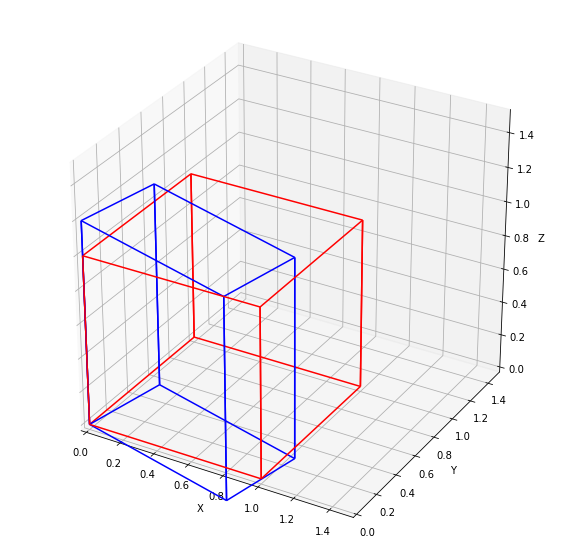

In [24]:
points = unitCube()
M = np.array([[0.80,0.10,0.00],
              [0.00,0.50,0.00],
              [-0.20,0.00,1.20],])
dev = devMatrix(M)
print("Derivates matrix: ")
print(dev)
defM = defMatrix(dev)
print("Deformation matrix: ")
print(defM)
print("Rotation matrix")
rotM = rotMatrix(dev)
print(rotM)
cal = corMatrix(M, points)

fig = plt.figure(figsize=[10,10])
ax1 = fig.add_subplot(111, projection='3d')
ax1.set_xlim([0, 1.5])
ax1.set_ylim([0, 1.5])
ax1.set_zlim([0, 1.5])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
plotCube(points,ax1,'red')
plotCube(cal,ax1,'blue')

plt.show()


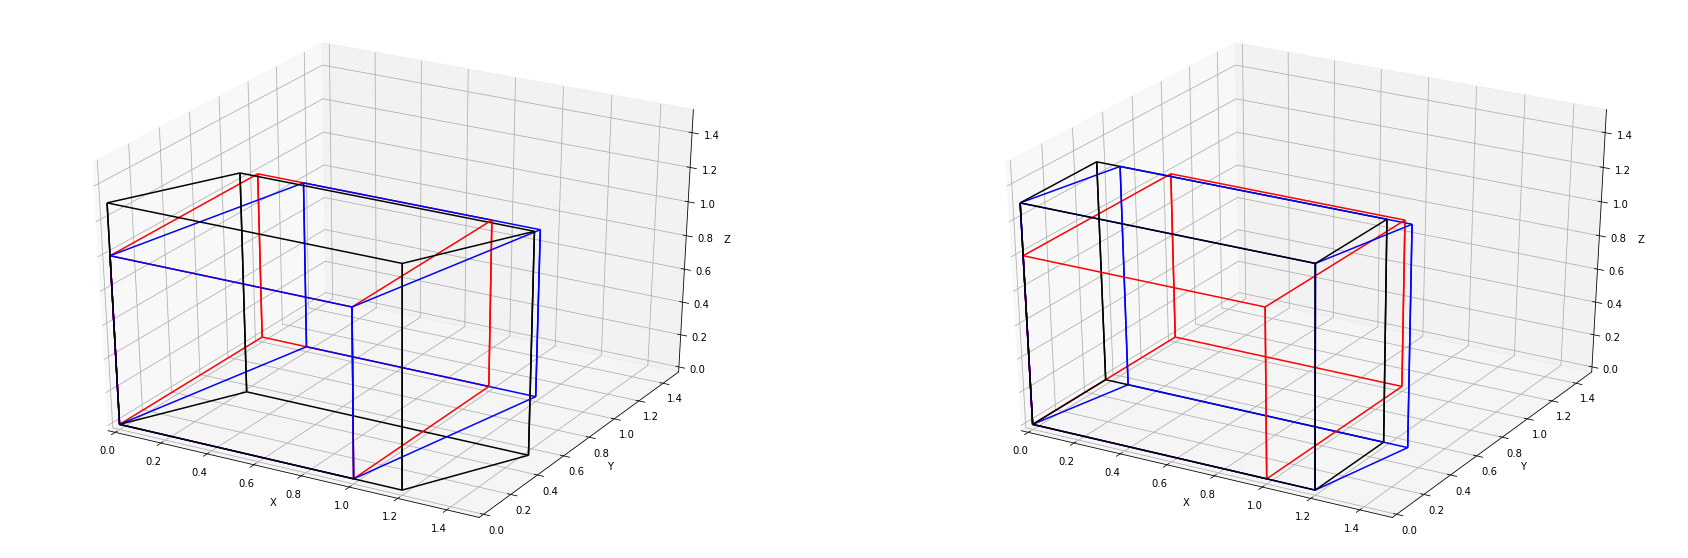

In [14]:
fig = plt.figure(figsize=[30,10])
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xlim([0, 1.5])
ax1.set_ylim([0, 1.5])
ax1.set_zlim([0, 1.5])
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

points = unitCube()
sheP = shear(Exy=0.2,Exz=0,Eyx=0,Eyz=0,Ezx=0,Ezy=0,data=points)
defP = deformation(Ex=0.2,Ey=-0.5,Ez=0.3,data=sheP)

plotCube(points,ax1,'red')
plotCube(sheP,ax1,'blue')
plotCube(defP,ax1,'black')

ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlim([0, 1.5])
ax2.set_ylim([0, 1.5])
ax2.set_zlim([0, 1.5])
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

defP = deformation(Ex=0.2,Ey=-0.5,Ez=0.3,data=points)
sheP = shear(Exy=0.2,Exz=0,Eyx=0,Eyz=0,Ezx=0,Ezy=0,data=defP)

plotCube(points,ax2,'red')
plotCube(sheP,ax2,'blue')
plotCube(defP,ax2,'black')
plt.show() 